In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read data

In [3]:
data = pd.read_csv('D:\FirstSemMT\ML\Assignments\cancer.csv')
data.drop(['id','diagnosis','Unnamed: 32'], axis = 1, inplace = True) 
data = data.values
samples,features = data.shape
print(samples,features)

569 30


#### Select random mean 

In [4]:
k=2
np.random.seed(1)
r1 = np.random.randint(samples, size=1)
r2 = np.random.randint(samples, size=1)
m1 = data[r1[0],:]
m2 = data[r2[0],:]
m1_new = m1
m2_new = m2

#### Scatter potting function (to plot at every iteration)

In [5]:
def plot_cluster(cluster_label,m1,m2):
    fig = plt.gcf()
    plt.scatter(m1[0],m1[1],color='r',s=50,label='Centroid 1')
    plt.scatter(m2[0],m2[1],color='black',s=50,label='Centroid 2')
    plt.scatter(data[np.where(cluster_label==1)[0],0],data[np.where(cluster_label==1)[0],1],label='Cluster 1')
    plt.scatter(data[np.where(cluster_label==2)[0],0],data[np.where(cluster_label==2)[0],1],label='Cluster 2')
    fig.set_size_inches(18.5, 10.5)
    plt.legend()
    plt.show()

#### Assign each data points to closest centroid and recompute the centroids 

In [6]:
cluster_label = np.zeros(samples)
itr=0

while(itr==0 or not(np.array_equal(m1, m1_new) and np.array_equal(m2, m2_new) )):
    m1 = m1_new
    m2 = m2_new
    for i in range(samples):
        d1 = np.linalg.norm(data[i] - m1,axis=0)
        d2 = np.linalg.norm(data[i] - m2,axis=0)
        if(d1<=d2):
            cluster_label[i]=1
        else:
            cluster_label[i]=2
    
    #plot_cluster(cluster_label,m1,m2)

    idx_cluster1 = np.where(cluster_label==1)
    m1_new = np.mean(data[idx_cluster1], axis=0)
    idx_cluster2 = np.where(cluster_label==2)
    m2_new = np.mean(data[idx_cluster2], axis=0)
    itr+=1
    
print(itr)

6


#### Number of points in clusters

In [7]:
cluster1_data = np.where(cluster_label==1)[0].shape[0]
print('Number of points in cluster 1 :' ,cluster1_data)
cluster2_data = np.where(cluster_label==2)[0].shape[0]
print('Number of points in cluster 2 :' ,cluster2_data)

Number of points in cluster 1 : 438
Number of points in cluster 2 : 131


### Scatter plot

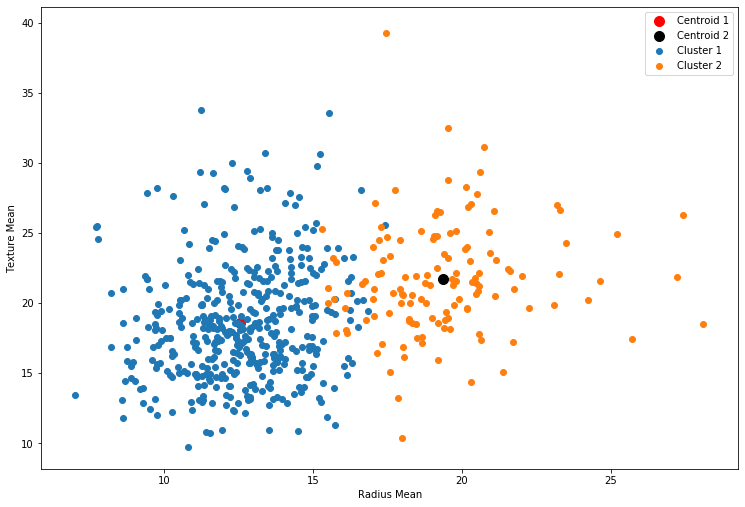

In [8]:
fig = plt.gcf()
plt.scatter(m1_new[0],m1_new[1],color='r',s=100,label='Centroid 1')
plt.scatter(m2_new[0],m2_new[1],color='black',s=100,label='Centroid 2')
plt.scatter(data[np.where(cluster_label==1)[0],0],data[np.where(cluster_label==1)[0],1],label='Cluster 1')
plt.scatter(data[np.where(cluster_label==2)[0],0],data[np.where(cluster_label==2)[0],1],label='Cluster 2')
fig.set_size_inches(12.5, 8.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()